In [20]:
# %pip install --upgrade wordcloud

In [45]:
import pandas as pd
import nltk

from wordcloud import WordCloud

import acquire
import prepare
import sql

## 1. Spam Data
    
    1. Load the spam data set.
    2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    3. Is there any overlap in the bigrams for the spam data and the ham data?
    4. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


### Loading


In [2]:
df = sql.get_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5572 non-null   int64 
 1   label   5572 non-null   object
 2   text    5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 174.1+ KB


### Prepare

In [3]:
nlp_cols = prepare.make_nlp_cols(df.text, extra_words=['u','ur','2', 'ltgt'])

In [7]:
spam = pd.concat([df, nlp_cols], axis=1)
spam

,id,label,text,cleaned,stemmed,lemmatized
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkts 21s...,free entry wkly comp win fa cup final tkts 21s...
3,3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though
...,...,...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried contact a750 pound prize claim ...,2nd time tri contact a750 pound prize claim ea...,2nd time tried contact a750 pound prize claim ...
5568,5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion
5570,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like ' interested buying so...,guy bitch act like ' interest buy someth els n...,guy bitching acted like ' interested buying so...


In [11]:
all_text = ' '.join(spam.stemmed)
spam_text = ' '.join(spam[spam.label =='spam'].stemmed)
ham_text = ' '.join(spam[spam.label =='ham'].stemmed)

In [13]:
all_counts = pd.Series(all_text.split(' ')).value_counts()
spam_counts = pd.Series(spam_text.split(' ')).value_counts()
ham_counts = pd.Series(ham_text.split(' ')).value_counts()

In [16]:
word_counts = pd.concat([all_counts, spam_counts, ham_counts], axis=1).fillna(0)
word_counts.columns = ['all','spam','ham']
word_counts

,all,spam,ham
',1871,127.0,1744.0
call,661,374.0,287.0
go,449,35.0,414.0
get,449,89.0,360.0
come,297,5.0,292.0
...,...,...,...
census,1,0.0,1.0
transcrib,1,0.0,1.0
temper,1,0.0,1.0
uncondit,1,0.0,1.0


In [21]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])


,all,spam,ham
said,86,0.0,86.0
da,132,0.0,132.0
later,134,0.0,134.0
say,138,0.0,138.0
lor,160,0.0,160.0
ltgt,276,0.0,276.0
a1000,35,35.0,0.0
18,43,43.0,0.0
guarante,50,50.0,0.0
tone,73,73.0,0.0


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

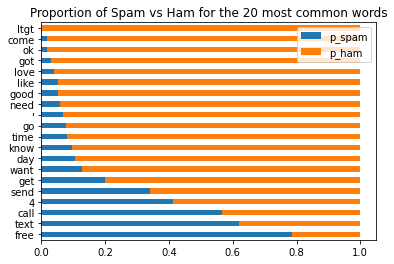

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


In [23]:
word_counts.spam.to_dict()

{"'": 127.0,
 'call': 374.0,
 'go': 35.0,
 'get': 89.0,
 'come': 5.0,
 '4': 122.0,
 'free': 220.0,
 'ok': 5.0,
 'ltgt': 0.0,
 'know': 26.0,
 'like': 13.0,
 'day': 27.0,
 'love': 10.0,
 'want': 31.0,
 'time': 19.0,
 'got': 7.0,
 'good': 12.0,
 'text': 140.0,
 'send': 71.0,
 'need': 11.0,
 'one': 10.0,
 'today': 36.0,
 'see': 19.0,
 'think': 14.0,
 'txt': 150.0,
 'home': 2.0,
 'take': 19.0,
 'stop': 115.0,
 'week': 88.0,
 'lor': 0.0,
 'repli': 109.0,
 'tell': 18.0,
 'sorri': 3.0,
 'mobil': 139.0,
 'still': 7.0,
 'r': 22.0,
 'back': 23.0,
 'make': 13.0,
 'n': 10.0,
 'phone': 57.0,
 'dont': 12.0,
 'say': 0.0,
 'new': 69.0,
 'later': 0.0,
 'pleas': 55.0,
 'work': 3.0,
 'da': 0.0,
 'ask': 6.0,
 'hi': 14.0,
 'miss': 10.0,
 'hope': 4.0,
 'meet': 6.0,
 'happi': 1.0,
 'night': 7.0,
 'claim': 115.0,
 'wait': 19.0,
 'thing': 3.0,
 'dear': 16.0,
 'much': 1.0,
 'great': 11.0,
 'well': 5.0,
 'tri': 38.0,
 'give': 8.0,
 'oh': 1.0,
 'hey': 5.0,
 'wat': 1.0,
 'pls': 11.0,
 'messag': 47.0,
 'number': 39.

In [31]:
cloud = WordCloud()
cloud.generate_from_frequencies(word_counts.spam.to_dict())

(-0.5, 399.5, 199.5, -0.5)

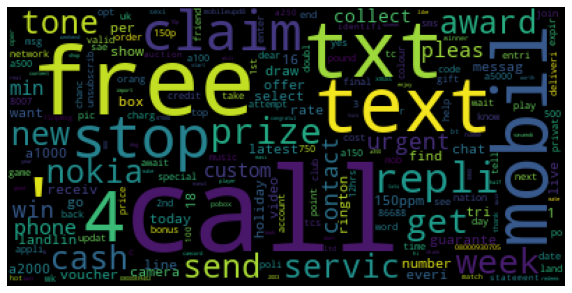

In [33]:
cloud.generate_from_frequencies(word_counts.spam.to_dict())
plt.figure(figsize=[10,8])
plt.imshow(cloud)
plt.axis('off')
plt.show()

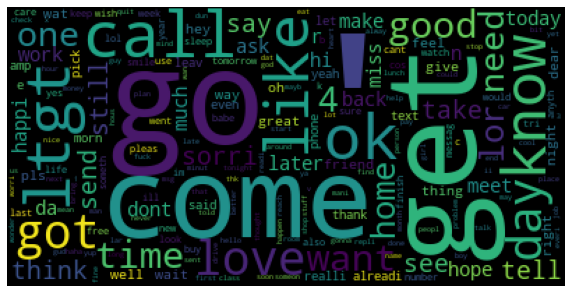

In [34]:
cloud.generate_from_frequencies(word_counts.ham.to_dict())
plt.figure(figsize=[10,8])
plt.imshow(cloud)
plt.axis('off')
plt.show()

People are talking about ltgt alot.  What is this sorcery?

In [44]:
print('\n\n'.join(spam[spam.stemmed.str.contains('ltgt')].text)[73:600])


A gram usually runs like  &lt;#&gt; , a half eighth is smarter though and gets you almost a whole second gram for  &lt;#&gt;

Does not operate after  &lt;#&gt;  or what

Turns out my friends are staying for the whole show and won't be back til ~ &lt;#&gt; , so feel free to go ahead and smoke that $ &lt;#&gt;  worth

Found it, ENC  &lt;#&gt; , where you at?

I sent you  &lt;#&gt;  bucks

Your account has been refilled successfully by INR  &lt;DECIMAL&gt; . Your KeralaCircle prepaid account balance is Rs  &lt;DECIMAL&gt; .


Got it.  `&lt;` is LessThan `<`. `&gt;` is GreaterThan `>`.  So really numbers have been replaced with `<#>`.
We can scrub it.

### Bigrams word cloud, ham vs spam


In [79]:
spam_bigrams = list(nltk.ngrams(spam_text.split(), 2))
ham_bigrams  = list(nltk.ngrams(ham_text.split(), 2))

In [77]:
hw = zip('hello','world')

In [78]:
list(hw)

[('h', 'w'), ('e', 'o'), ('l', 'r'), ('l', 'l'), ('o', 'd')]

In [90]:
pd.Series(spam_bigrams).value_counts()
type(pd.Series(spam_bigrams).index)

pandas.core.indexes.range.RangeIndex

In [97]:
type(pd.Series(spam_bigrams).value_counts())

pandas.core.series.Series

In [104]:
type(pd.Series(spam_bigrams).value_counts()) == pd.core.series.Series

True

In [134]:
pd.Series(spam_bigrams).value_counts().shape

(6913,)

In [141]:
def plot_wordcloud(input , figsize=[12,9]):
    
    from wordcloud import WordCloud
    cloud = WordCloud()
    input_type = type(input)
    if input_type == str:
        cloud.generate(input)
    
    if input_type == list:
        input = pd.Series(input)
        input_type = type(input)

    if input_type == pd.core.series.Series:
        input = input.value_counts().to_dict()
        input_type = type(input)
    
    if input_type == dict:
        output = {}
        for k, v in input.items():
            if type(k) != str:
                if type(k) == tuple:
                    output[' '.join(k)] = v
                else:
                    output[str(k)] = v
            else:
                output[k] = v
        cloud.generate_from_frequencies(output)
    
    plt.figure(figsize=figsize)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

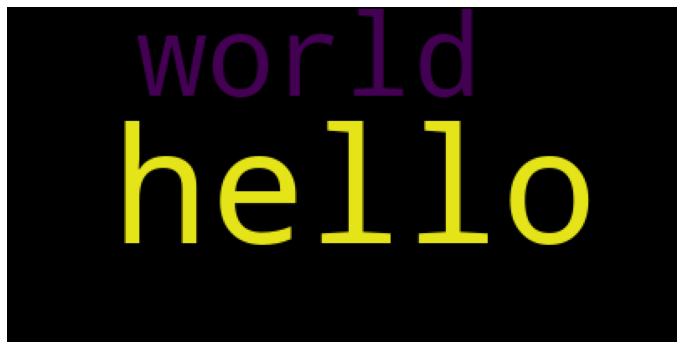

In [138]:
plot_wordcloud('hello world')

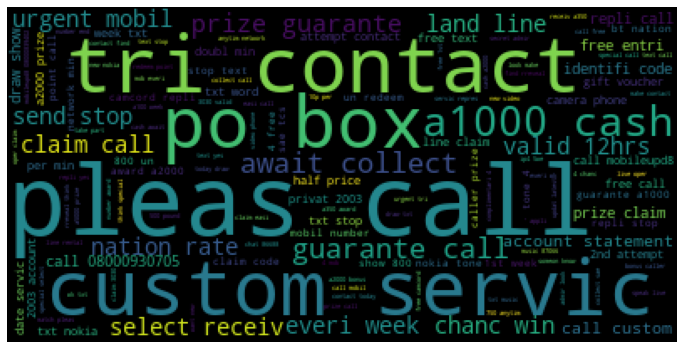

In [142]:
plot_wordcloud(spam_bigrams)

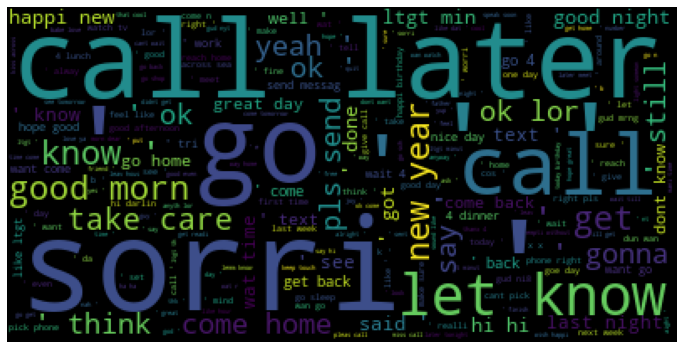

In [143]:
plot_wordcloud(ham_bigrams)

### Trigrams word cloud, ham vs spam

In [150]:
def make_ngrams(words, n):
    if type(words) == pd.core.series.Series:
        input = ' '.join(words)
    else:
        input = words
    output = input.split(' ')
    return pd.Series(nltk.ngrams(output, n))

In [151]:
make_ngrams(spam.lemmatized, 2)

0              (go, jurong)
1           (jurong, point)
2            (point, crazy)
3        (crazy, available)
4        (available, bugis)
                ...        
50956             (gave, u)
50957             (u, free)
50958          (free, rofl)
50959          (rofl, true)
50960          (true, name)
Length: 50961, dtype: object

In [152]:
ham3grams = make_ngrams(ham_text, 3)
spam3grams = make_ngrams(spam_text, 3)

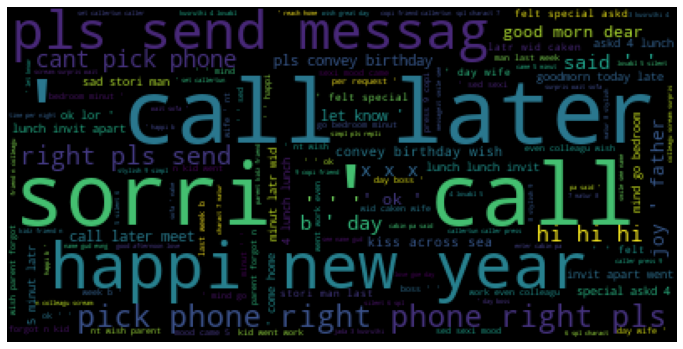

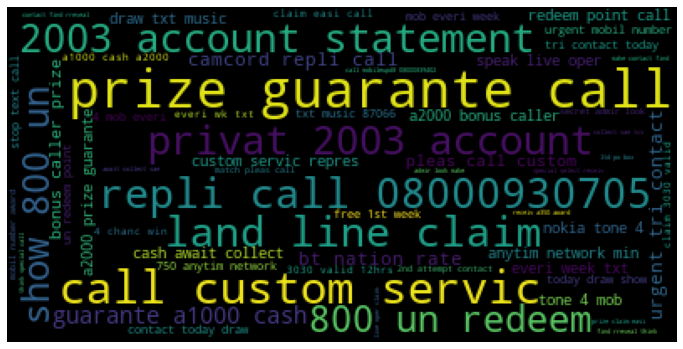

In [153]:
plot_wordcloud(ham3grams)
plot_wordcloud(spam3grams)

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.
    


## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.